In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm , preprocessing

//anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
df = pd.read_csv("data/churn.csv") 

In [5]:
df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  Churn?  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 572.9+ KB


In [7]:
LB = preprocessing.LabelBinarizer()

In [8]:
df["Churn?"] = LB.fit_transform(df['Churn?'])

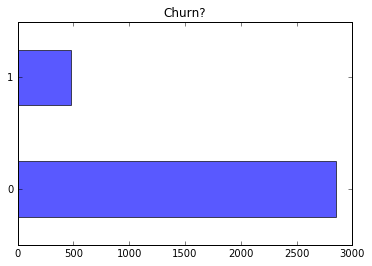

In [9]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df["Churn?"].value_counts().plot(kind='barh', color="blue", alpha=.65)
plt.title("Churn?")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60e6533c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f60db628f90>]], dtype=object)

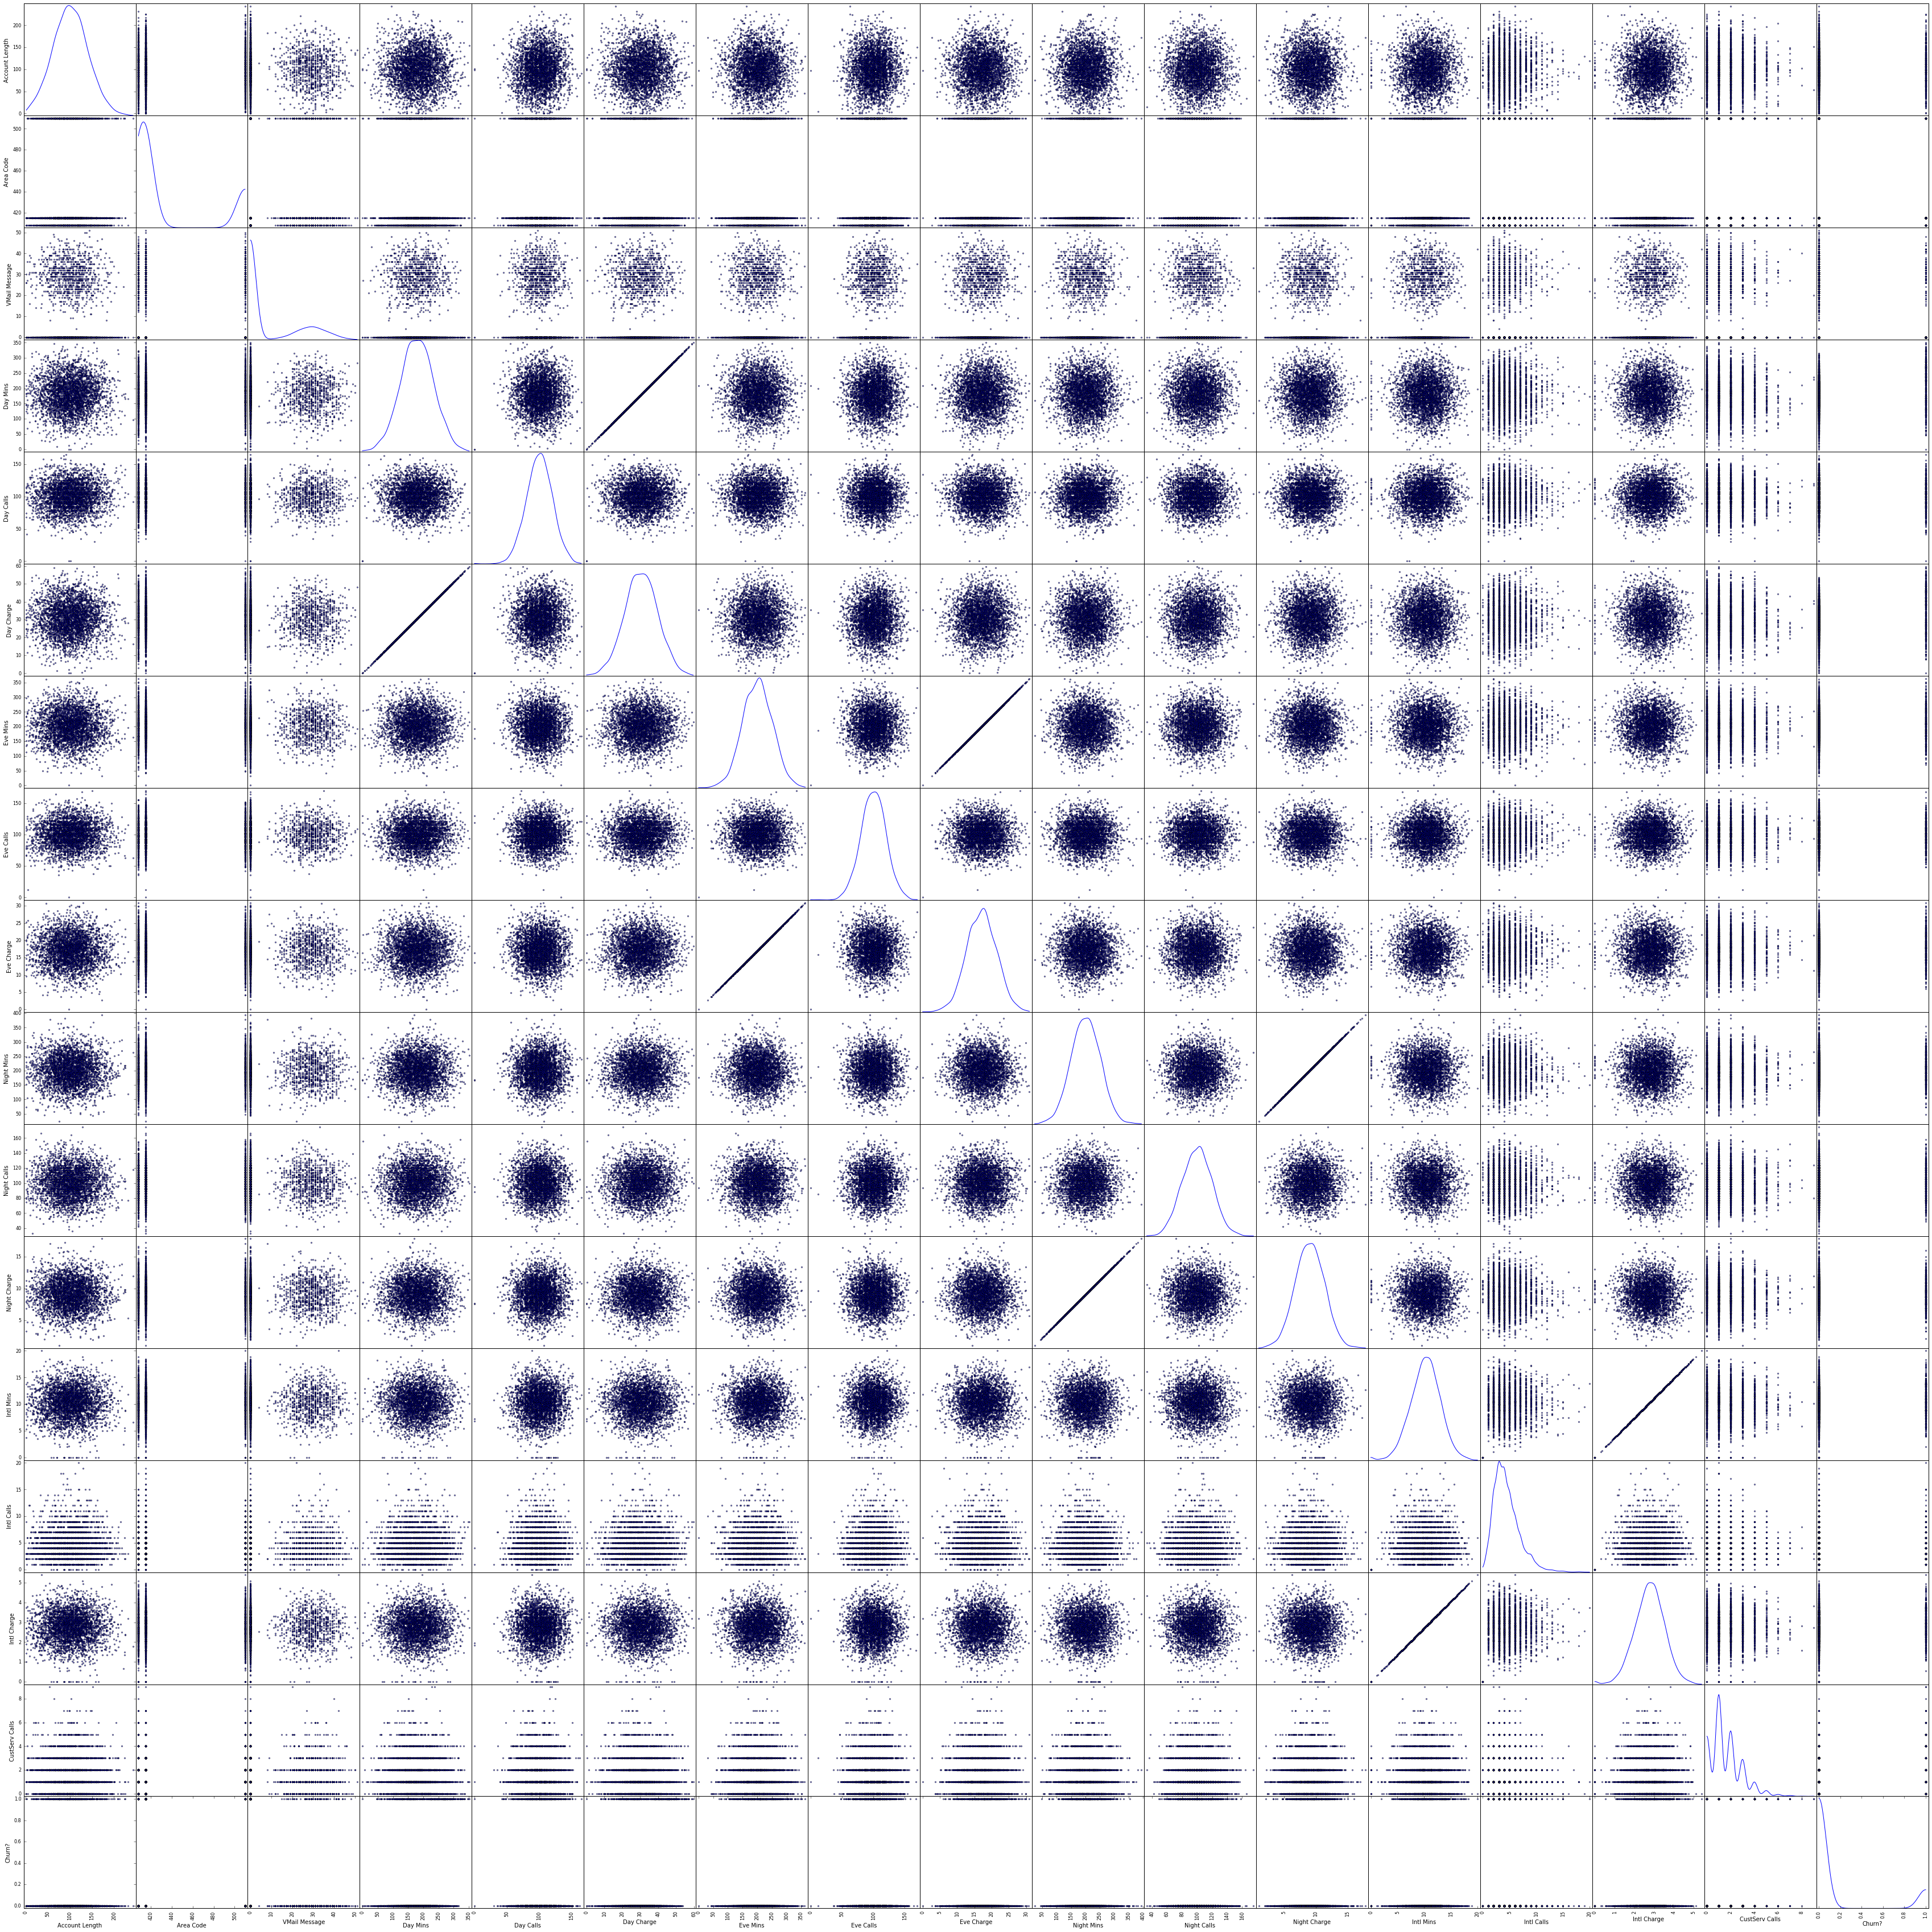

In [10]:
pd.scatter_matrix(df,figsize=(60, 60), diagonal='kde')

In [11]:
import seaborn as sns

In [12]:
df.corr()

Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
Account Length        1.000000  -0.012463      -0.004628  0.006216   0.038470   
Area Code            -0.012463   1.000000      -0.001994 -0.008264  -0.009646   
VMail Message        -0.004628  -0.001994       1.000000  0.000778  -0.009548   
Day Mins              0.006216  -0.008264       0.000778  1.000000   0.006750   
Day Calls             0.038470  -0.009646      -0.009548  0.006750   1.000000   
Day Charge            0.006214  -0.008264       0.000776  1.000000   0.006753   
Eve Mins             -0.006757   0.003580       0.017562  0.007043  -0.021451   
Eve Calls             0.019260  -0.011886      -0.005864  0.015769   0.006462   
Eve Charge           -0.006745   0.003607       0.017578  0.007029  -0.021449   
Night Mins           -0.008955  -0.005825       0.007681  0.004323   0.022938   
Night Calls          -0.013176   0.016522       0.007123  0.022972  -0.019557   
Night Charge         -0.008960  -0.005845       0.007663  0.004300   0.022927   
Intl Mins             0.009514  -0.018288       0.002856 -0.010155   0.021565   
Intl Calls            0.020661  -0.024179       0.013957  0.008033   0.004574   
Intl Charge           0.009546  -0.018395       0.002884 -0.010092   0.021666   
CustServ Calls       -0.003796   0.027572      -0.013263 -0.013423  -0.018942   
Churn?                0.016541   0.006174      -0.089728  0.205151   0.018459   

                Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
Account Length    0.006214 -0.006757   0.019260   -0.006745   -0.008955   
Area Code        -0.008264  0.003580  -0.011886    0.003607   -0.005825   
VMail Message     0.000776  0.017562  -0.005864    0.017578    0.007681   
Day Mins          1.000000  0.007043   0.015769    0.007029    0.004323   
Day Calls         0.006753 -0.021451   0.006462   -0.021449    0.022938   
Day Charge        1.000000  0.007050   0.015769    0.007036    0.004324   
Eve Mins          0.007050  1.000000  -0.011430    1.000000   -0.012584   
Eve Calls         0.015769 -0.011430   1.000000   -0.011423   -0.002093   
Eve Charge        0.007036  1.000000  -0.011423    1.000000   -0.012592   
Night Mins        0.004324 -0.012584  -0.002093   -0.012592    1.000000   
Night Calls       0.022972  0.007586   0.007710    0.007596    0.011204   
Night Charge      0.004301 -0.012593  -0.002056   -0.012601    0.999999   
Intl Mins        -0.010157 -0.011035   0.008703   -0.011043   -0.015207   
Intl Calls        0.008032  0.002541   0.017434    0.002541   -0.012353   
Intl Charge      -0.010094 -0.011067   0.008674   -0.011074   -0.015180   
CustServ Calls   -0.013427 -0.012985   0.002423   -0.012987   -0.009288   
Churn?            0.205151  0.092796   0.009233    0.092786    0.035493   

                Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
Account Length    -0.013176     -0.008960   0.009514    0.020661     0.009546   
Area Code          0.016522     -0.005845  -0.018288   -0.024179    -0.018395   
VMail Message      0.007123      0.007663   0.002856    0.013957     0.002884   
Day Mins           0.022972      0.004300  -0.010155    0.008033    -0.010092   
Day Calls         -0.019557      0.022927   0.021565    0.004574     0.021666   
Day Charge         0.022972      0.004301  -0.010157    0.008032    -0.010094   
Eve Mins           0.007586     -0.012593  -0.011035    0.002541    -0.011067   
Eve Calls          0.007710     -0.002056   0.008703    0.017434     0.008674   
Eve Charge         0.007596     -0.012601  -0.011043    0.002541    -0.011074   
Night Mins         0.011204      0.999999  -0.015207   -0.012353    -0.015180   
Night Calls        1.000000      0.011188  -0.013605    0.000305    -0.013630   
Night Charge       0.011188      1.000000  -0.015214   -0.012329    -0.015186   
Intl Mins         -0.013605     -0.015214   1.000000    0.032304     0.999993   
Intl Calls         0.000305     -0.012329   0.032304    1.000000     0.0

//anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


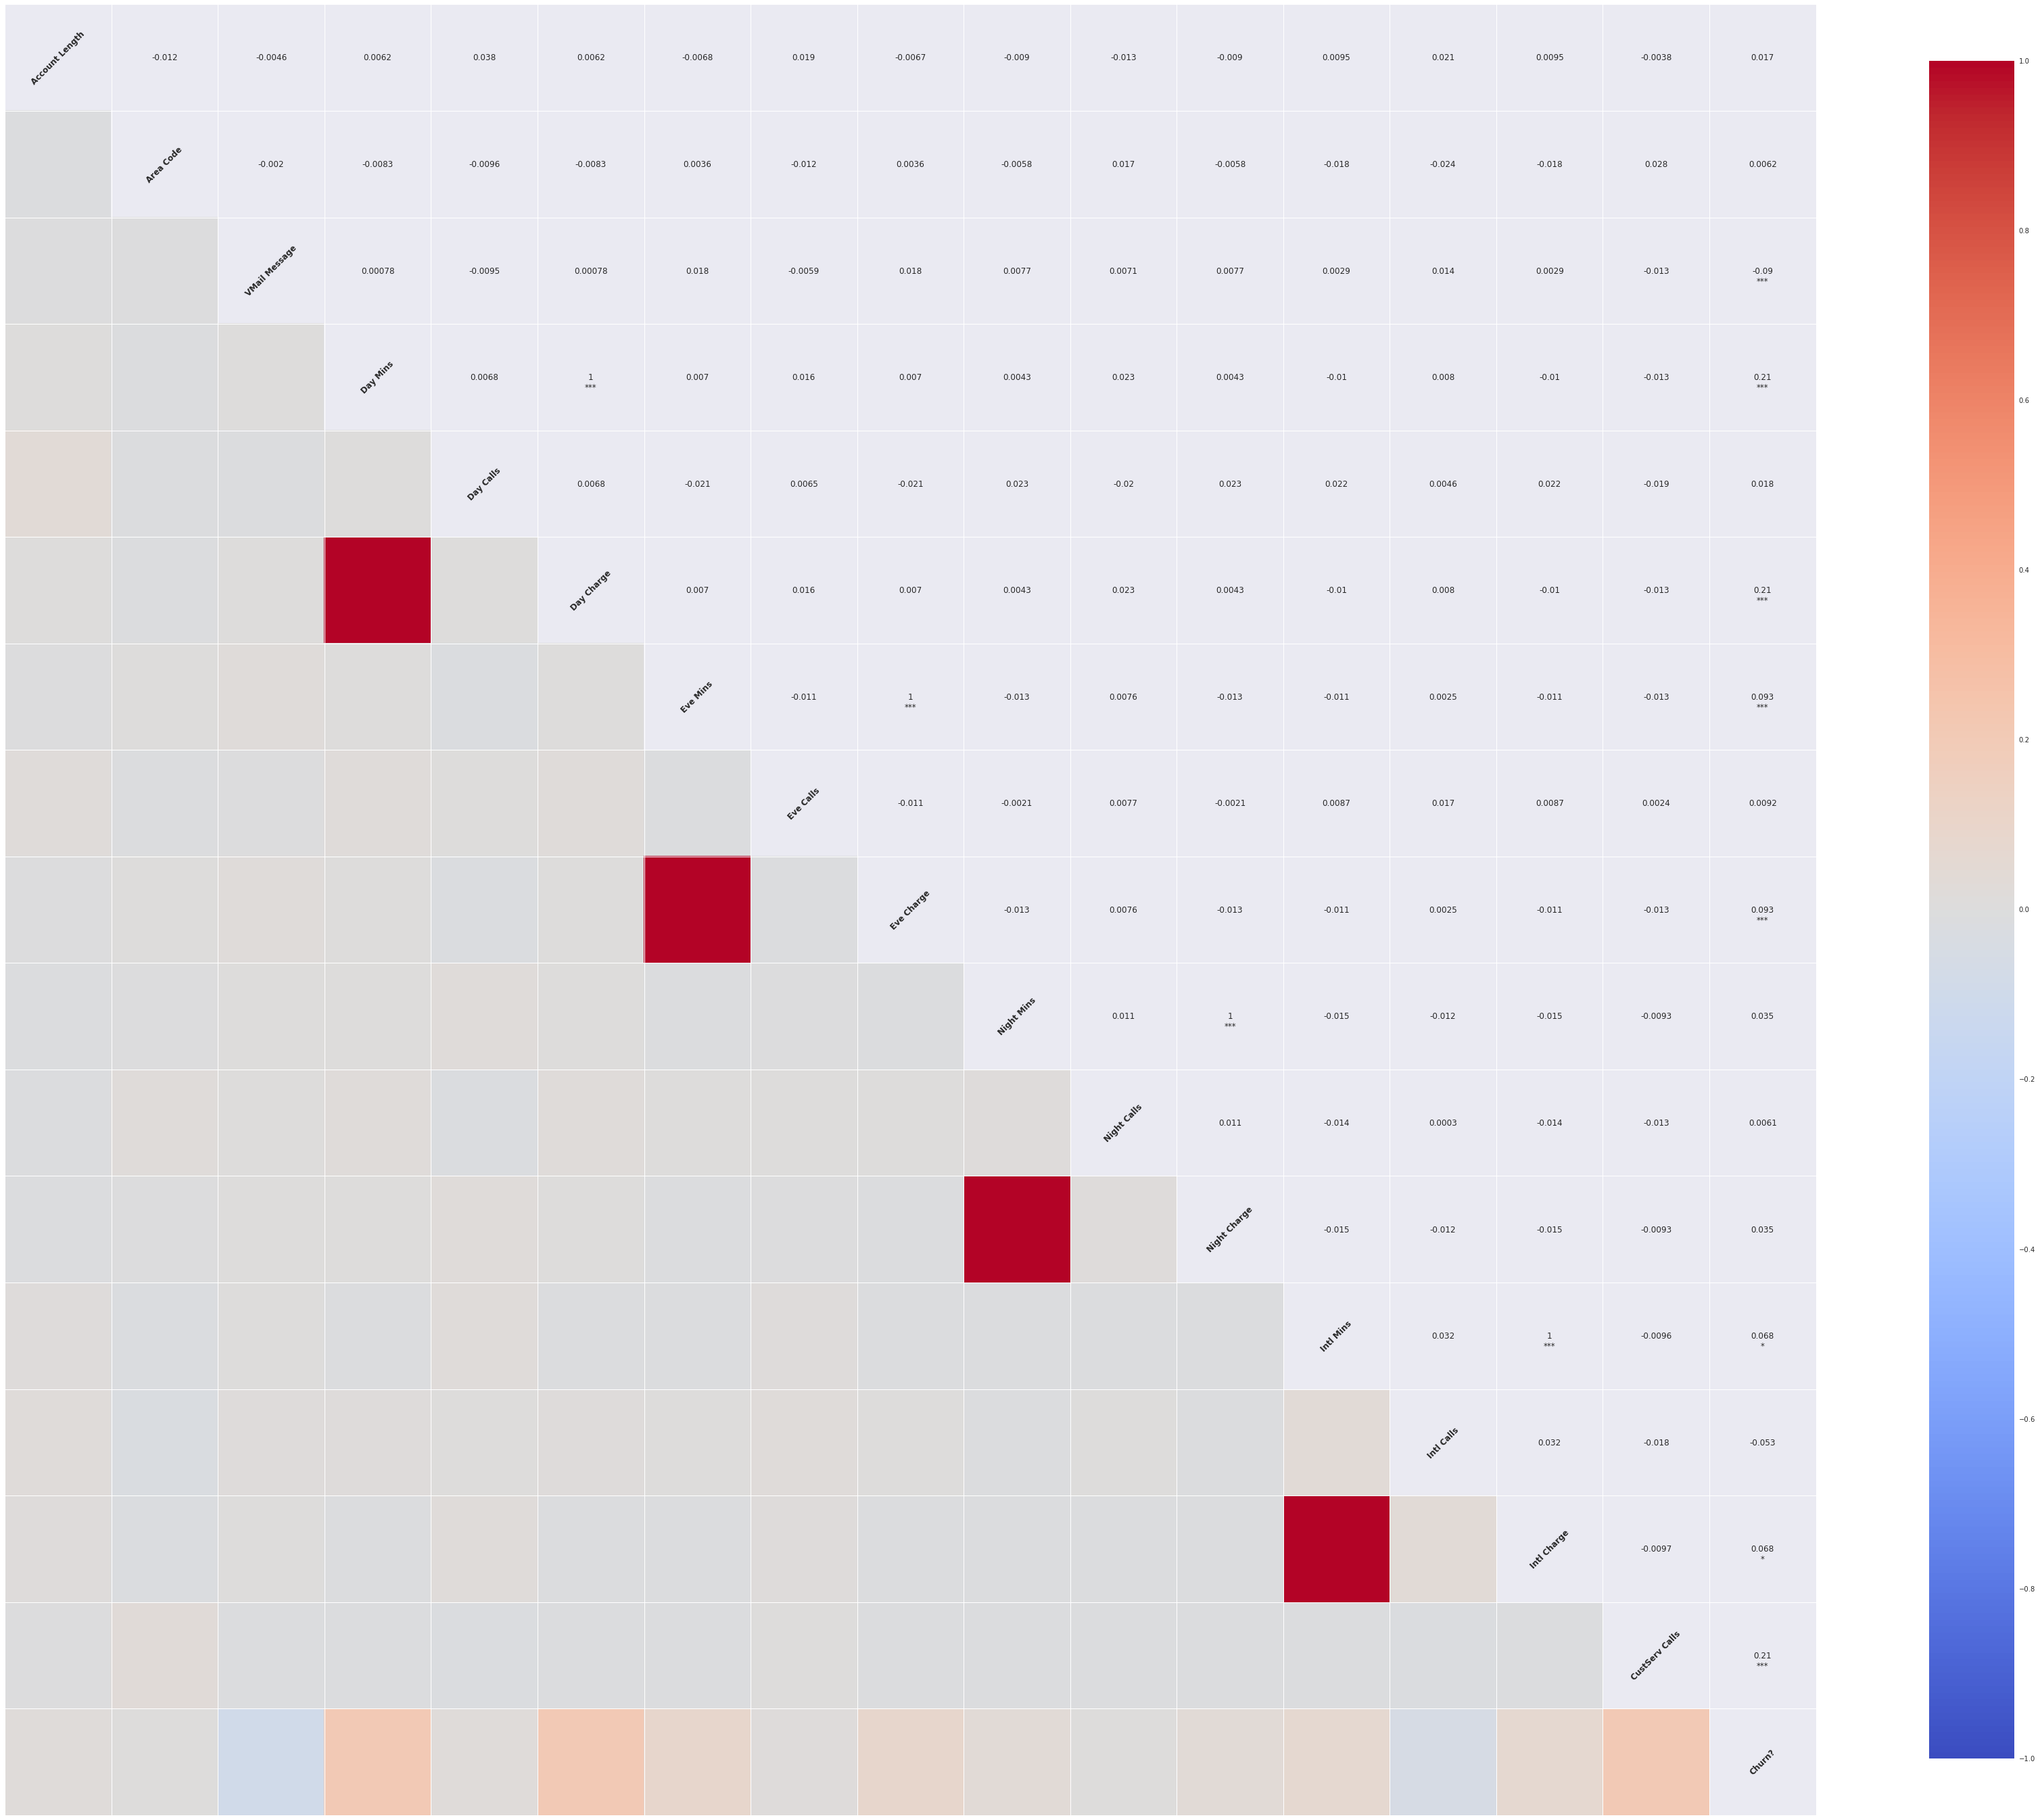

In [13]:
fig, ax = plt.subplots(figsize=(60, 60))
sns.corrplot(df,ax=ax)

In [14]:
df.columns

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan',
       u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Churn?'],
      dtype='object')

In [15]:
df.columns = [u'State', u'Account Length', u'Area Code', u'Phone', u'Intl Plan',
       u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Churn?']

In [16]:
# Remove charge features as they're correlated with minutes

In [17]:
Features_list = ['State', 'Account Length', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins',
       'Night Calls', 'Intl Mins', 'Intl Calls', 'CustServ Calls']

In [18]:
Labels = ['Churn?']

In [19]:
X = df[Features_list]
y = df[Labels]

In [20]:
label_encoder = preprocessing.LabelEncoder()

In [21]:
X['Intl Plan'] = label_encoder.fit_transform(X['Intl Plan'])

/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
X['VMail Plan'] = label_encoder.fit_transform(X['VMail Plan'])

/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
X = pd.get_dummies(X)

In [24]:
X = X.drop("State_WY",axis=1)

In [25]:
scaler = preprocessing.StandardScaler()

In [26]:
X[[u'Account Length', 
        u'VMail Message',       u'Day Mins',      u'Day Calls',
             u'Eve Mins',      u'Eve Calls',     u'Night Mins',
          u'Night Calls',      u'Intl Mins',     u'Intl Calls',
       u'CustServ Calls']] = scaler.fit_transform(X[[u'Account Length', 
        u'VMail Message',       u'Day Mins',      u'Day Calls',
             u'Eve Mins',      u'Eve Calls',     u'Night Mins',
          u'Night Calls',      u'Intl Mins',     u'Intl Calls',
       u'CustServ Calls']])

In [27]:
X.head()

Account Length  Intl Plan  VMail Plan  VMail Message  Day Mins  Day Calls  \
0        0.676489          0           1       1.234883  1.566767   0.476643   
1        0.149065          0           1       1.307948 -0.333738   1.124503   
2        0.902529          0           0      -0.591760  1.168304   0.675985   
3       -0.428590          1           0      -0.591760  2.196596  -1.466936   
4       -0.654629          1           0      -0.591760 -0.240090   0.626149   

   Eve Mins  Eve Calls  Night Mins  Night Calls    ...     State_SC  State_SD  \
0 -0.070610  -0.055940    0.866743    -0.465494    ...            0         0   
1 -0.108080   0.144867    1.058571     0.147825    ...            0         0   
2 -1.573383   0.496279   -0.756869     0.198935    ...            0         0   
3 -2.742865  -0.608159   -0.078551    -0.567714    ...            0         0   
4 -1.038932   1.098699   -0.276311     1.067803    ...            0         0   

   State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_WV  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 63 columns]

In [28]:
X.columns[0:13]

Index([u'Account Length', u'Intl Plan', u'VMail Plan', u'VMail Message',
       u'Day Mins', u'Day Calls', u'Eve Mins', u'Eve Calls', u'Night Mins',
       u'Night Calls', u'Intl Mins', u'Intl Calls', u'CustServ Calls'],
      dtype='object')

In [29]:
X = X.as_matrix().astype(np.float)

In [30]:
y = y.as_matrix().astype(np.float)

In [31]:
from sklearn import cross_validation

In [32]:
idx = cross_validation.StratifiedShuffleSplit(y,n_iter=1,
                                                    test_size=0.3,
                                                    random_state=0)

In [33]:
for train_index, test_index in idx:
    train = train_index
    test = test_index

In [34]:
x_train, x_test = X[train], X[test]
y_train, y_test = y[train], y[test]

In [38]:
idx = cross_validation.StratifiedShuffleSplit(y_test,n_iter=1,
                                                    test_size=0.5,
                                                    random_state=0)
for train_index, test_index in idx:
    train = train_index
    test = test_index

In [39]:
x_val, x_test_split = x_test[train], x_test[test]
y_val, y_test_split = y_test[train], y_test[test]

In [40]:
def cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    k_fold = cross_validation.StratifiedKFold(y.ravel(), n_folds=n_folds, shuffle=shuffle)
    y_pred = y.ravel().copy()
    for ii, jj in k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y.ravel()[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [41]:
from sklearn import *

//anaconda2/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
//anaconda2/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [42]:
print('Passive Aggressive Classifier: {:.2f}'.format(metrics.accuracy_score(y_train, cv(x_train, y_train, linear_model.PassiveAggressiveClassifier))))

Passive Aggressive Classifier: 0.82


In [43]:
print('Passive Aggressive Classifier: {:.2f}'.format(metrics.accuracy_score(y_train, cv(x_train, y_train, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y_train, cv(x_train, y_train, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y_train, cv(x_train, y_train, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y_train, cv(x_train, y_train, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y_train, cv(x_train, y_train, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y_train, cv(x_train, y_train, linear_model.LogisticRegression))))

Passive Aggressive Classifier: 0.82
Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.86
Random Forest Classifier:      0.91
K Nearest Neighbor Classifier: 0.88
Logistic Regression:           0.86


In [44]:
print('Dump Classifier: {:.2f}'.format(metrics.accuracy_score(y, [0 for ii in y.tolist()])))

Dump Classifier: 0.86


In [45]:
print('Passive Aggressive Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(x_train, y_train, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(x_train, y_train, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y_train, cv(x_train, y_train, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(x_train, y_train, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(x_train, y_train, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_train, cv(x_train, y_train, linear_model.LogisticRegression))))
print('Dump Classifier:\n {}\n'.format(metrics.classification_report(y, [0 for ii in y.tolist()])))

print('Extreme Trees Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(x_train, y_train, ensemble.ExtraTreesClassifier))))

Passive Aggressive Classifier:
              precision    recall  f1-score   support

        0.0       0.89      0.88      0.89      1995
        1.0       0.35      0.39      0.37       338

avg / total       0.82      0.81      0.81      2333


Gradient Boosting Classifier:
              precision    recall  f1-score   support

        0.0       0.95      0.99      0.97      1995
        1.0       0.89      0.68      0.77       338

avg / total       0.94      0.94      0.94      2333


Support vector machine(SVM):
              precision    recall  f1-score   support

        0.0       0.86      1.00      0.93      1995
        1.0       0.94      0.05      0.10       338

avg / total       0.87      0.86      0.81      2333


Random Forest Classifier:
              precision    recall  f1-score   support

        0.0       0.91      0.99      0.95      1995
        1.0       0.87      0.45      0.59       338

avg / total       0.91      0.91      0.90      2333


K Nearest Neighb

//anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
polynomial_features = preprocessing.PolynomialFeatures()
X_poly = polynomial_features.fit_transform(x_train[:,0:13])

In [47]:
X_combo = np.append(X_poly,x_train[:,13:],axis=1)

In [48]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(X_combo, y_train, ensemble.GradientBoostingClassifier))))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

        0.0       0.95      0.99      0.97      1995
        1.0       0.92      0.71      0.80       338

avg / total       0.95      0.95      0.95      2333




In [49]:
print('Passive Aggressive Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(X_combo, y_train, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(X_combo, y_train, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y_train, cv(X_combo, y_train, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(X_combo, y_train, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y_train, cv(X_combo, y_train, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_train, cv(X_combo, y_train, linear_model.LogisticRegression))))
print('Dump Classifier:\n {}\n'.format(metrics.classification_report(y, [0 for ii in y.tolist()])))

Passive Aggressive Classifier:
              precision    recall  f1-score   support

        0.0       0.92      0.91      0.91      1995
        1.0       0.49      0.53      0.51       338

avg / total       0.86      0.85      0.85      2333


Gradient Boosting Classifier:
              precision    recall  f1-score   support

        0.0       0.95      0.98      0.97      1995
        1.0       0.89      0.71      0.79       338

avg / total       0.94      0.95      0.94      2333


Support vector machine(SVM):
              precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      1995
        1.0       0.94      0.31      0.46       338

avg / total       0.90      0.90      0.87      2333


Random Forest Classifier:
              precision    recall  f1-score   support

        0.0       0.92      0.99      0.95      1995
        1.0       0.88      0.50      0.64       338

avg / total       0.91      0.92      0.91      2333


K Nearest Neighb

In [50]:
import xgboost as xgb

In [51]:
print('XGBClassifier:  {:.2f}'.format(metrics.accuracy_score(y_train, cv(x_train, y_train, xgb.XGBClassifier))))

XGBClassifier:  0.94


In [75]:
XGB = xgb.XGBClassifier()

In [76]:
params = {'max_depth':[2,3,4], 'n_estimators':[300,500,1000], 'learning_rate':[.01,0.05,.1,1],
          'reg_alpha':[0,1,3,5], 'reg_lambda':[0,1,3,5]
         }

In [77]:
clf = grid_search.GridSearchCV(XGB, params,scoring='f1',n_jobs=-1)

In [78]:
clf.fit(X_combo,y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 500, 1000], 'reg_lambda': [0, 1, 3, 5], 'learning_rate': [0.01, 0.05, 0.1, 1], 'reg_alpha': [0, 1, 3, 5], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [79]:
clf.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 300,
 'reg_alpha': 1,
 'reg_lambda': 0}

XGB
{'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 300,
 'reg_alpha': 1,
 'reg_lambda': 0}

In [80]:
clf.best_score_

0.77963673489697238

In [81]:
polynomial_features = preprocessing.PolynomialFeatures()
X_poly_val = polynomial_features.fit_transform(x_val[:,0:13])

In [82]:
X_combo_val = np.append(X_poly_val,x_val[:,13:],axis=1)

In [84]:
print('Best Estimator:\n {}\n'.format(metrics.classification_report(y_val, clf.best_estimator_.predict(X_combo_val))))

Best Estimator:
              precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       428
        1.0       0.93      0.86      0.89        72

avg / total       0.97      0.97      0.97       500




In [85]:
polynomial_features = preprocessing.PolynomialFeatures()
X_poly_val = polynomial_features.fit_transform(x_test_split[:,0:13])

In [86]:
X_combo_val = np.append(X_poly_val,x_test_split[:,13:],axis=1)

In [87]:
print('Best Estimator:\n {}\n'.format(metrics.classification_report(y_test_split, clf.best_estimator_.predict(X_combo_val))))

Best Estimator:
              precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       427
        1.0       0.93      0.78      0.85        73

avg / total       0.96      0.96      0.96       500




## Stacked Model

In [88]:
clfs = [ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), neighbors.KNeighborsClassifier(),
       linear_model.LogisticRegression()]

In [89]:
stack = []

In [90]:
for clf in clfs:
    model = grid_search.GridSearchCV(clf,{},scoring='f1',n_jobs=-1)
    model.fit(x_train,y_train.ravel())
    stack.append(model.best_estimator_)

In [91]:
f = np.array(map(lambda x: x.predict(x_train),stack))

In [179]:
XGB = xgb.XGBClassifier()

In [92]:
params = {'max_depth':[2,3,4], 'n_estimators':[300,500,1000], 'learning_rate':[.01,0.05,.1,1]
         }

In [93]:
clf_stacked = grid_search.GridSearchCV(XGB, params,scoring='f1',n_jobs=-1)

In [94]:
clf_stacked.fit(f.T,y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 500, 1000], 'learning_rate': [0.01, 0.05, 0.1, 1], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [95]:
print(metrics.classification_report(y_train.ravel(), clf_stacked.best_estimator_.predict(f.T)))

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      1995
        1.0       0.99      0.96      0.97       338

avg / total       0.99      0.99      0.99      2333



In [99]:
clf_stacked.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}

In [104]:
results = []
for r in reg_params:
    for l in reg_params:
        XGB = xgb.XGBClassifier(learning_rate=.01,max_depth=2,n_estimators=300,reg_alpha=r,reg_lambda=l)
        XGB.fit(x_train,y_train.ravel())
        results.append((r,l,metrics.f1_score(y_val,XGB.predict(x_val))))

In [105]:
results

[(0.01, 0.01, 0.58490566037735847),
 (0.01, 0.1, 0.58490566037735847),
 (0.01, 0.25, 0.58490566037735847),
 (0.01, 0.5, 0.58490566037735847),
 (0.01, 1, 0.58490566037735847),
 (0.01, 2, 0.57943925233644866),
 (0.01, 5, 0.53465346534653468),
 (0.01, 10, 0.50505050505050497),
 (0.1, 0.01, 0.58490566037735847),
 (0.1, 0.1, 0.58490566037735847),
 (0.1, 0.25, 0.58490566037735847),
 (0.1, 0.5, 0.58490566037735847),
 (0.1, 1, 0.58490566037735847),
 (0.1, 2, 0.56603773584905659),
 (0.1, 5, 0.53465346534653468),
 (0.1, 10, 0.48979591836734698),
 (0.25, 0.01, 0.58490566037735847),
 (0.25, 0.1, 0.58490566037735847),
 (0.25, 0.25, 0.58490566037735847),
 (0.25, 0.5, 0.58490566037735847),
 (0.25, 1, 0.58490566037735847),
 (0.25, 2, 0.56603773584905659),
 (0.25, 5, 0.53465346534653468),
 (0.25, 10, 0.48979591836734698),
 (0.5, 0.01, 0.58490566037735847),
 (0.5, 0.1, 0.58490566037735847),
 (0.5, 0.25, 0.58490566037735847),
 (0.5, 0.5, 0.58490566037735847),
 (0.5, 1, 0.58490566037735847),
 (0.5, 2, 0.5

In [96]:
e = np.array(map(lambda x: x.predict_proba(x_test_split)[:,0],stack))

In [97]:
print(metrics.classification_report(y_val.ravel(), clf_stacked.best_estimator_.predict(e.T)))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       428
        1.0       0.06      0.38      0.10        72

avg / total       0.01      0.05      0.01       500

